Question 1

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


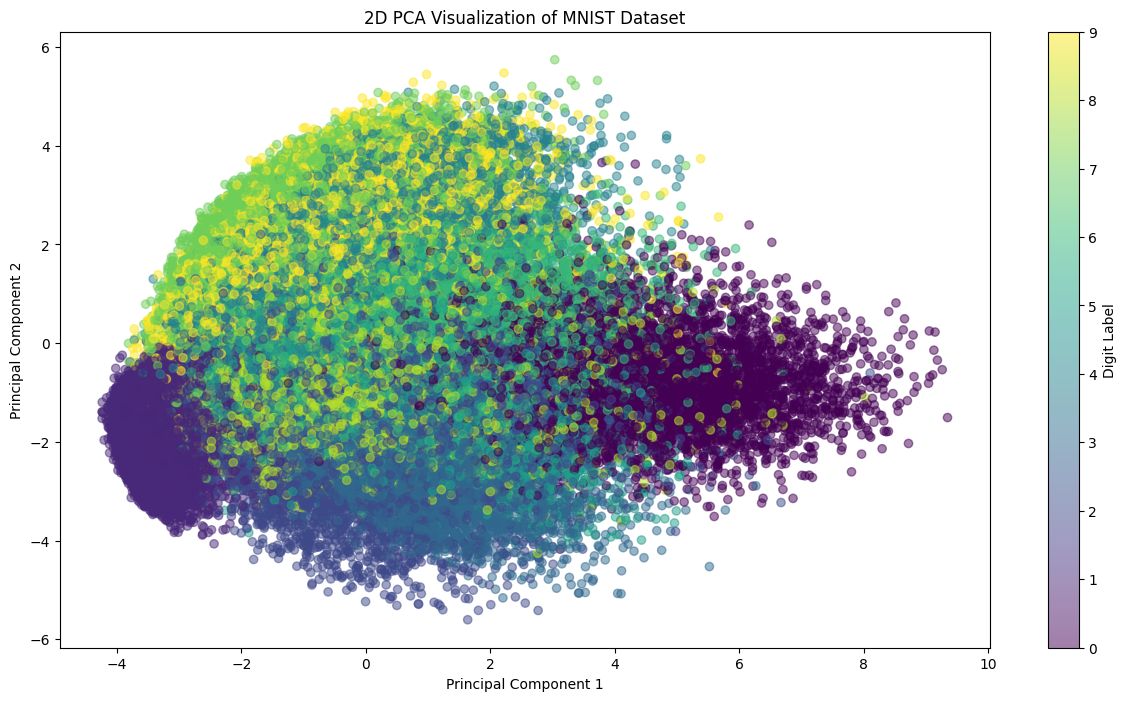

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import pandas as pd

mnist = fetch_openml(name="mnist_784")
X = mnist.data.astype('float64')
y = mnist.target.astype('int')

X_normalized = X / 255.0

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_normalized)

principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_df['Label'] = y

plt.figure(figsize=(15, 8))
scatter = plt.scatter(principal_df['PC1'], principal_df['PC2'], c=principal_df['Label'], cmap='viridis', alpha=0.5)
plt.title('2D PCA Visualization of MNIST Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Digit Label', ticks=range(10))
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


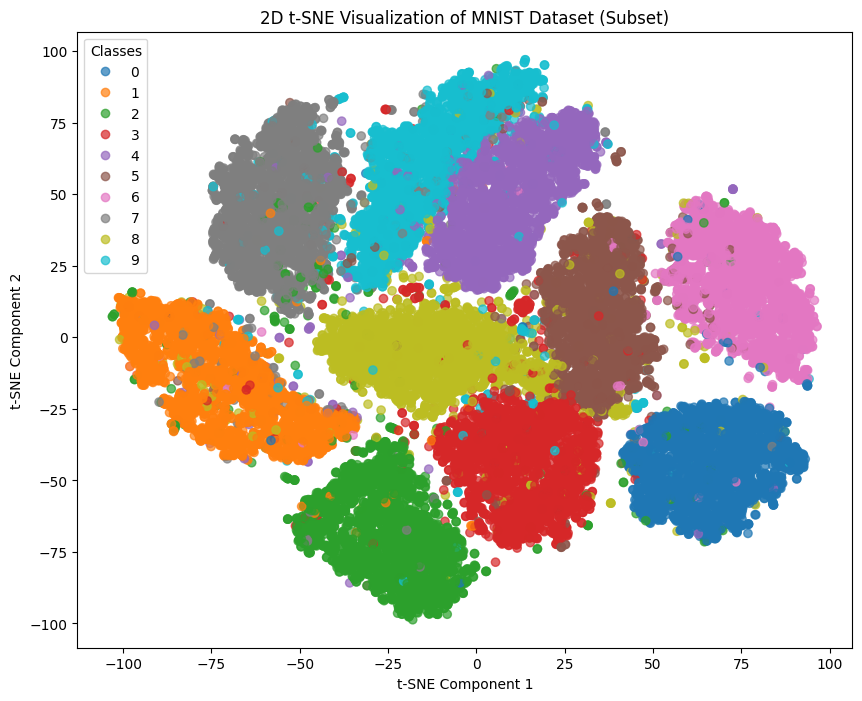

In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
import numpy as np

mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

X_subset = X[:30000]
y_subset = y[:30000]

label_encoder = LabelEncoder()
y_subset_numeric = label_encoder.fit_transform(y_subset)

tsne = TSNE(n_components=2, random_state=42)
tsne_data = tsne.fit_transform(X_subset)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=y_subset_numeric, cmap='tab10', alpha=0.7)
plt.title('2D t-SNE Visualization of MNIST Dataset (Subset)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(*scatter.legend_elements(), title='Classes')
plt.show()


Question 2 for fashion mnist

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


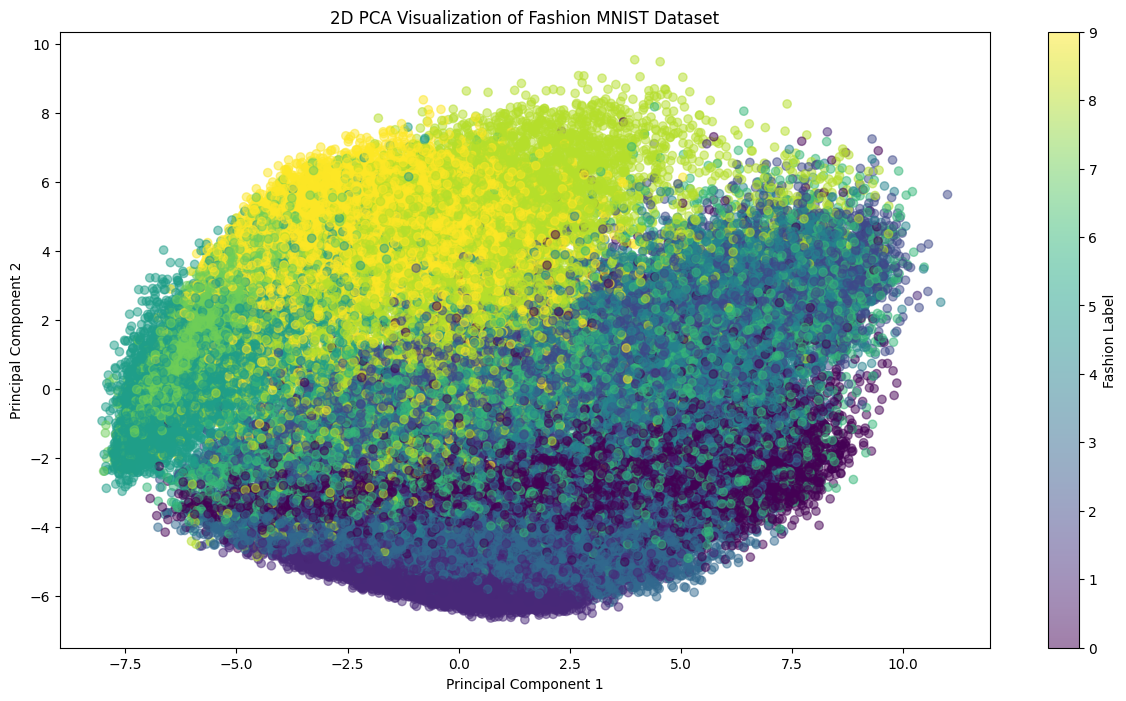

In [6]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

fashion_mnist = fetch_openml(name="Fashion-MNIST")
X = fashion_mnist.data.astype('float64')
y = fashion_mnist.target.astype('int')

X_normalized = X / 255.0

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_normalized)

principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_df['Label'] = y

# Visualize the 2D projection with increased x-axis width
plt.figure(figsize=(15, 8))  # Increase the width of the figure
scatter = plt.scatter(principal_df['PC1'], principal_df['PC2'], c=principal_df['Label'], cmap='viridis', alpha=0.5)
plt.title('2D PCA Visualization of Fashion MNIST Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Fashion Label', ticks=range(10))
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


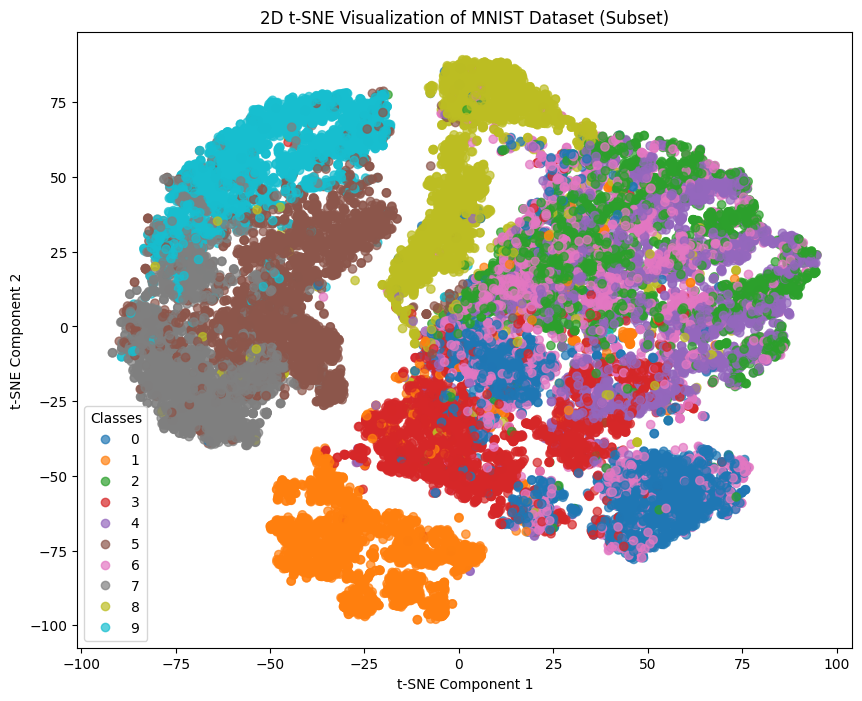

In [5]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

fashion_mnist = fetch_openml(name="Fashion-MNIST")
X = fashion_mnist.data.astype('float64')
y = fashion_mnist.target.astype('int')

X_subset = X[:30000]
y_subset = y[:30000]

label_encoder = LabelEncoder()
y_subset_numeric = label_encoder.fit_transform(y_subset)

tsne = TSNE(n_components=2, random_state=42)
tsne_data = tsne.fit_transform(X_subset)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=y_subset_numeric, cmap='tab10', alpha=0.7)
plt.title('2D t-SNE Visualization of MNIST Dataset (Subset)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(*scatter.legend_elements(), title='Classes')
plt.show()


Question 2 for ai21b dataset

In [13]:
import os
import re
from PIL import Image
import numpy as np

def read_images(directory):
    x_train = []
    y_train = []
    target_width = 92
    target_height = 112

    for friend_dir in os.listdir(directory):
        friend_path = os.path.join(directory, friend_dir)

        if os.path.isdir(friend_path):
            print(f"Processing directory: {friend_path}")
            for image_file in os.listdir(friend_path):
                image_path = os.path.join(friend_path, image_file)

                try:
                    if os.path.isfile(image_path) and image_file.lower().endswith(('.png', '.jpg', '.jpeg')):
                        img = Image.open(image_path).convert('L')

                        img = img.resize((target_width, target_height))

                        img_array = np.array(img)

                        x_train.append(img_array)

                        friend_name = extract_friend_name(image_file)

                        y_train.append(friend_name)
                except Exception as e:
                    print(f"Error reading image {image_path}: {e}")

    return np.array(x_train), np.array(y_train)

def extract_friend_name(image_filename):
    if '_' in image_filename:
        friend_name = image_filename.split('_')[0]
    else:
        idx = next((i for i, c in enumerate(image_filename) if c.isdigit()), None)
        if idx is not None:
            friend_name = image_filename[:idx]
            friend_name = image_filename.split('.')[0]
    return friend_name  # Add this line to return the friend_name


train_directory = r"/content/drive/MyDrive/ai21b"
x_train, y_train = read_images(train_directory)

print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)

unique_labels = np.unique(y_train)
print("Unique labels:", unique_labels)


Processing directory: /content/drive/MyDrive/ai21b/10 files from yashveer on Mar 5, 2024
Processing directory: /content/drive/MyDrive/ai21b/10 files from SINGAM SETTY S A DESHIK on Mar 4, 2024
Processing directory: /content/drive/MyDrive/ai21b/10 files from Shrey Sinha on Mar 5, 2024
Processing directory: /content/drive/MyDrive/ai21b/10 files from SAI SRAVANTH on Mar 5, 2024
Processing directory: /content/drive/MyDrive/ai21b/10 files from Sreya Gunda on Mar 5, 2024 (1)
Processing directory: /content/drive/MyDrive/ai21b/10 files from SUNNY KUMAR SINGH on Mar 5, 2024
Processing directory: /content/drive/MyDrive/ai21b/10 files from Varshith Rangapuram on Mar 5, 2024
Processing directory: /content/drive/MyDrive/ai21b/10 files from Tejas Budhwal on Mar 5, 2024
Processing directory: /content/drive/MyDrive/ai21b/10 files from Toshit Tejasvat on Mar 4, 2024
Processing directory: /content/drive/MyDrive/ai21b/10 files from Swapnil Srivastava on Mar 5, 2024
Processing directory: /content/drive/My

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


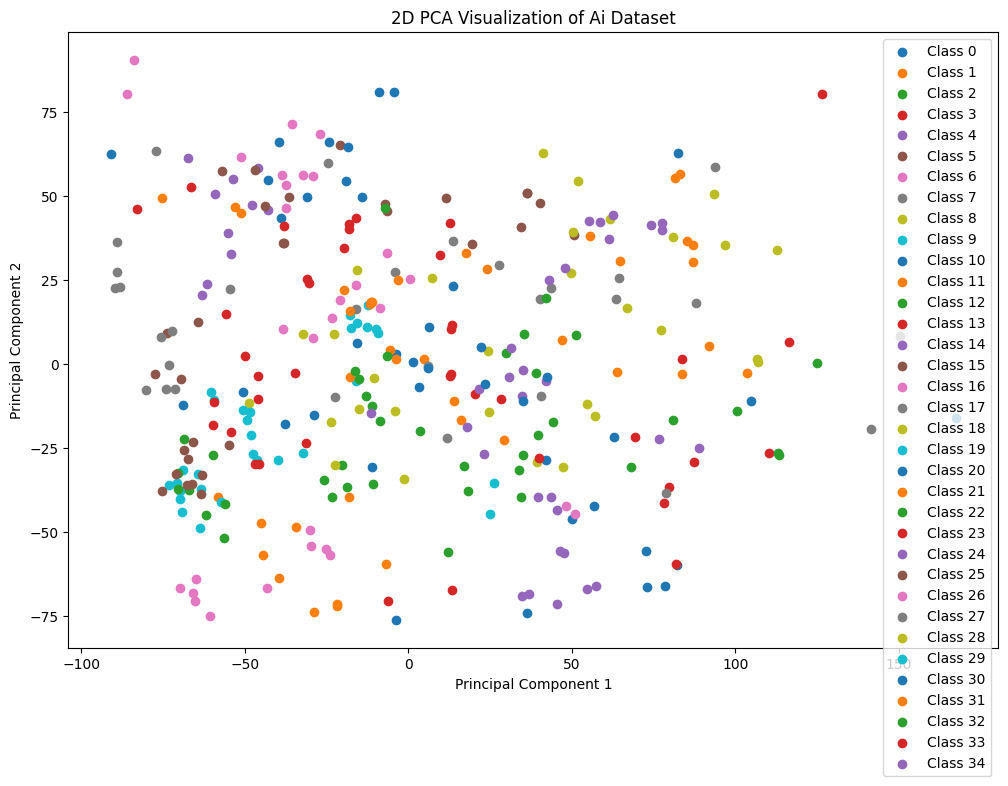

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

x_train_flat = x_train.reshape(x_train.shape[0], -1)

scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train_flat)

pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train_std)

# One-Hot Encode labels
encoder = OneHotEncoder(sparse=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))  # Reshape for single feature

plt.figure(figsize=(12, 8))

for class_index in range(y_train_onehot.shape[1]):  # Iterate through encoded classes
    class_data = y_train_onehot[:, class_index]  # Get data for each encoded class
    class_indices = np.where(class_data == 1)[0]  # Find indices with value 1 (indicating that class)
    plt.scatter(x_train_pca[class_indices, 0], x_train_pca[class_indices, 1], label=f'Class {class_index}')  # Use class index for label

plt.title('2D PCA Visualization of Ai Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


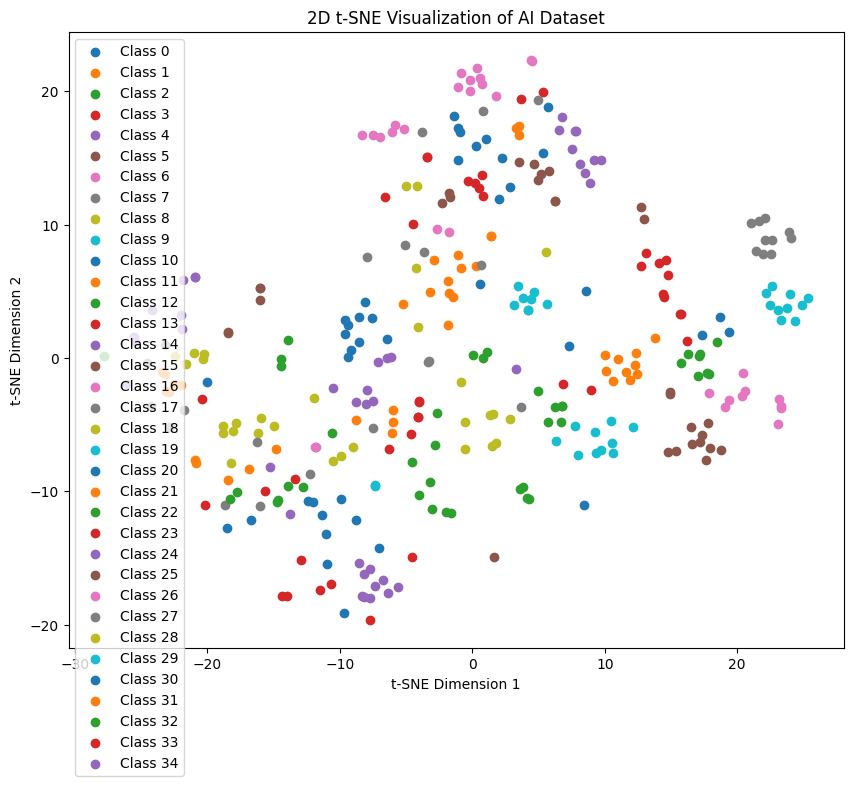

In [16]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
import numpy as np

tsne = TSNE(n_components=2, random_state=42)
x_train_tsne = tsne.fit_transform(x_train_std)

le = LabelEncoder()
y_train_numeric = le.fit_transform(y_train)

plt.figure(figsize=(10, 8))

for class_label in np.unique(y_train_numeric):
    class_indices = np.where(y_train_numeric == class_label)
    plt.scatter(x_train_tsne[class_indices, 0], x_train_tsne[class_indices, 1], label=f'Class {class_label}')

plt.title('2D t-SNE Visualization of AI Dataset')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.show()


Question 3

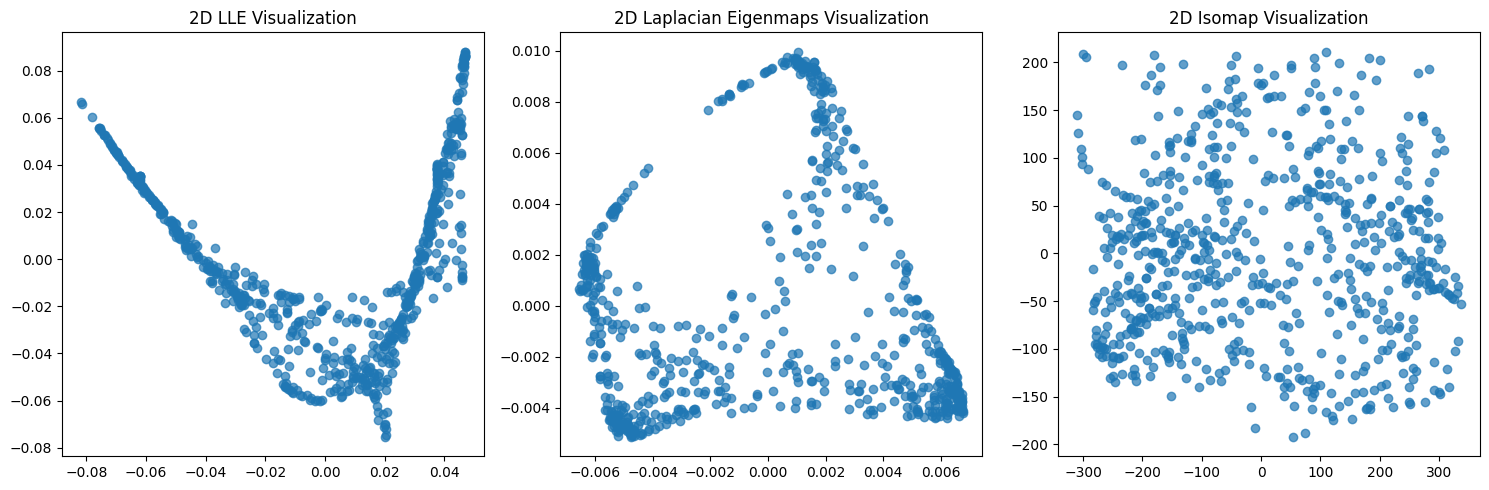

In [21]:
from scipy.io import loadmat
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import LocallyLinearEmbedding, SpectralEmbedding, Isomap
import matplotlib.pyplot as plt

mat = loadmat('/content/face_data.mat')
face_data = mat['images'].T
face_data_flat = face_data.reshape(face_data.shape[0], -1)

scaler = StandardScaler()
face_data_std = scaler.fit_transform(face_data_flat)

lle = LocallyLinearEmbedding(n_components=2)
face_data_lle = lle.fit_transform(face_data_std)

laplacian = SpectralEmbedding(n_components=2)
face_data_laplacian = laplacian.fit_transform(face_data_std)

isomap = Isomap(n_components=2)
face_data_isomap = isomap.fit_transform(face_data_std)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(face_data_lle[:, 0], face_data_lle[:, 1], alpha=0.7)
plt.title('2D LLE Visualization')

plt.subplot(1, 3, 2)
plt.scatter(face_data_laplacian[:, 0], face_data_laplacian[:, 1], alpha=0.7)
plt.title('2D Laplacian Eigenmaps Visualization')

plt.subplot(1, 3, 3)
plt.scatter(face_data_isomap[:, 0], face_data_isomap[:, 1], alpha=0.7)
plt.title('2D Isomap Visualization')

plt.tight_layout()
plt.show()


In [24]:
from sklearn import manifold
import pandas as pd
import math

pd.options.display.max_columns = 7

df = pd.DataFrame(mat['images']).T

num_images, num_pixels = df.shape
pixels_per_dimension = int(math.sqrt(num_pixels))

for idx in df.index:
    df.loc[idx] = df.loc[idx].values.reshape(pixels_per_dimension, pixels_per_dimension).T.reshape(-1)

iso = manifold.Isomap(n_neighbors=6, n_components=2)
iso.fit(df)
manifold_2Da = iso.transform(df)
manifold_2D = pd.DataFrame(manifold_2Da, columns=['Component 1', 'Component 2'])

manifold_2D.head()

Component 1  Component 2
0   -26.169063    -0.578853
1    32.540561   -12.856883
2   -22.208343     6.490292
3    52.831644   -30.531746
4   -41.978740     8.017211

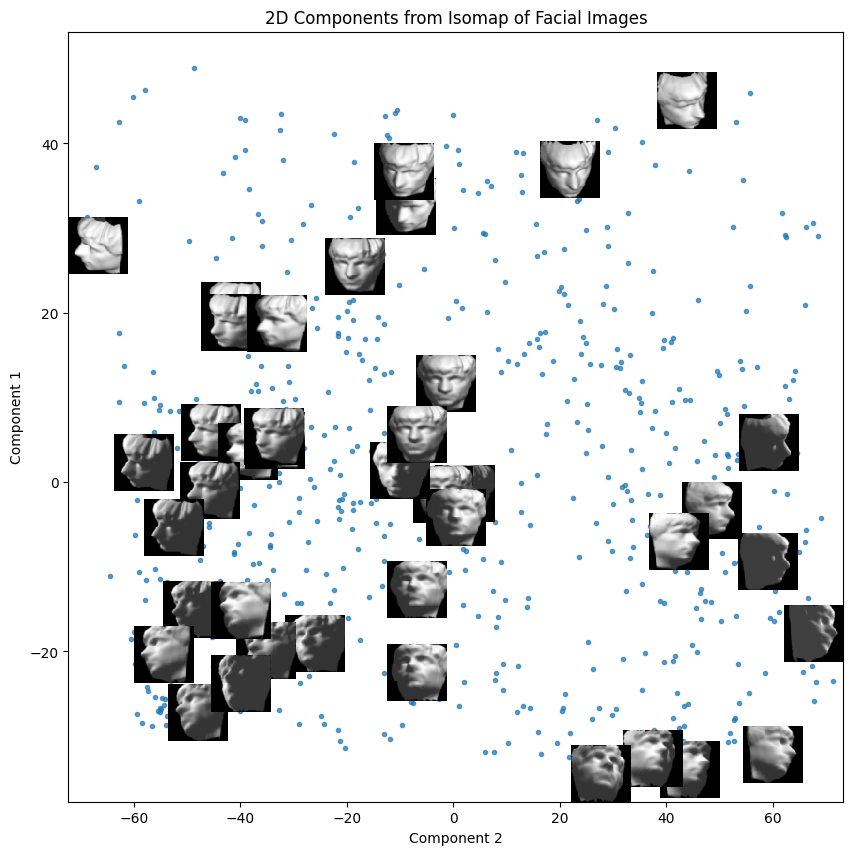

In [29]:

%matplotlib inline

fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(111)
ax.set_title('2D Components from Isomap of Facial Images')
ax.set_xlabel('Component: 1')
ax.set_ylabel('Component: 2')

x_size = (max(manifold_2D['Component 1']) - min(manifold_2D['Component 1'])) * 0.08
y_size = (max(manifold_2D['Component 2']) - min(manifold_2D['Component 2'])) * 0.08
for i in range(40):
    img_num = np.random.randint(0, num_images)
    x0 = manifold_2D.loc[img_num, 'Component 1'] - (x_size / 2.)
    y0 = manifold_2D.loc[img_num, 'Component 2'] - (y_size / 2.)
    x1 = manifold_2D.loc[img_num, 'Component 1'] + (x_size / 2.)
    y1 = manifold_2D.loc[img_num, 'Component 2'] + (y_size / 2.)
    img = df.iloc[img_num,:].values.reshape(pixels_per_dimension, pixels_per_dimension)
    ax.imshow(img, aspect='auto', cmap=plt.cm.gray,
              interpolation='nearest', zorder=100000, extent=(x0, x1, y0, y1))
ax.scatter(manifold_2D['Component 1'], manifold_2D['Component 2'], marker='.',alpha=0.7)

ax.set_ylabel('Component 1')
ax.set_xlabel('Component 2')

plt.show()

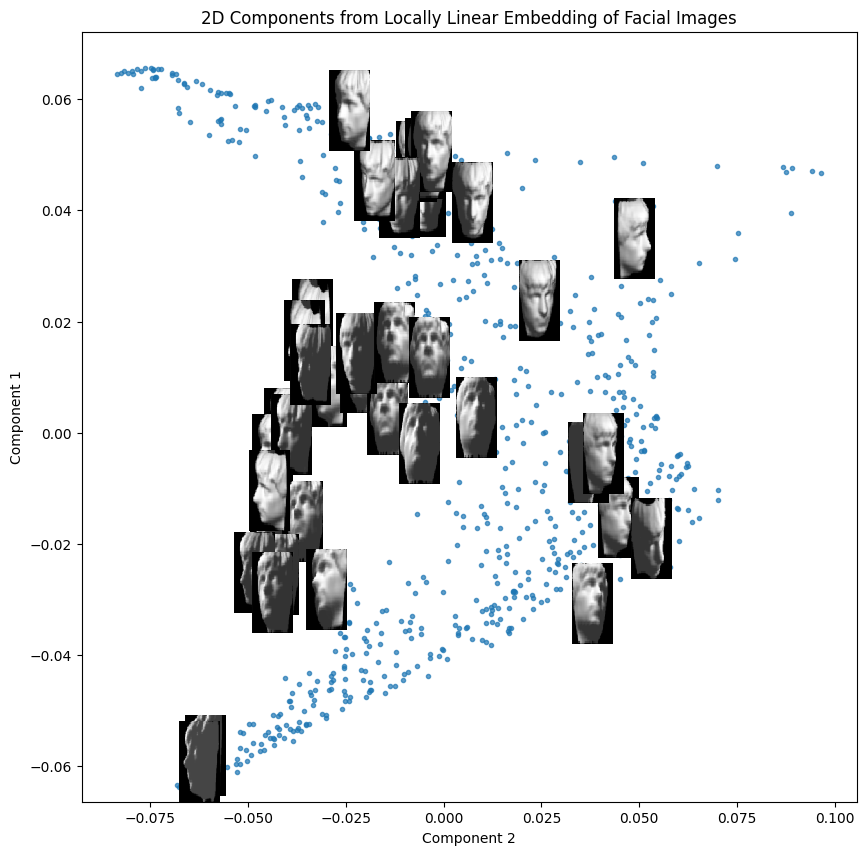

In [30]:
lle = LocallyLinearEmbedding(n_neighbors=6, n_components=2)
lle_result = lle.fit_transform(df)
lle_df = pd.DataFrame(lle_result, columns=['Component 1', 'Component 2'])

fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(111)
ax.set_title('2D Components from Locally Linear Embedding of Facial Images')
ax.set_xlabel('Component: 1')
ax.set_ylabel('Component: 2')

x_size = (max(lle_df['Component 1']) - min(lle_df['Component 1'])) * 0.08
y_size = (max(lle_df['Component 2']) - min(lle_df['Component 2'])) * 0.08
for i in range(40):
    img_num = np.random.randint(0, num_images)
    x0 = lle_df.loc[img_num, 'Component 1'] - (x_size / 2.)
    y0 = lle_df.loc[img_num, 'Component 2'] - (y_size / 2.)
    x1 = lle_df.loc[img_num, 'Component 1'] + (x_size / 2.)
    y1 = lle_df.loc[img_num, 'Component 2'] + (y_size / 2.)
    img = df.iloc[img_num, :].values.reshape(pixels_per_dimension, pixels_per_dimension)
    ax.imshow(img, aspect='auto', cmap=plt.cm.gray, interpolation='nearest', zorder=100000, extent=(x0, x1, y0, y1))

ax.scatter(lle_df['Component 2'], lle_df['Component 1'], marker='.', alpha=0.7)

ax.set_ylabel('Component 1')
ax.set_xlabel('Component 2')

plt.show()


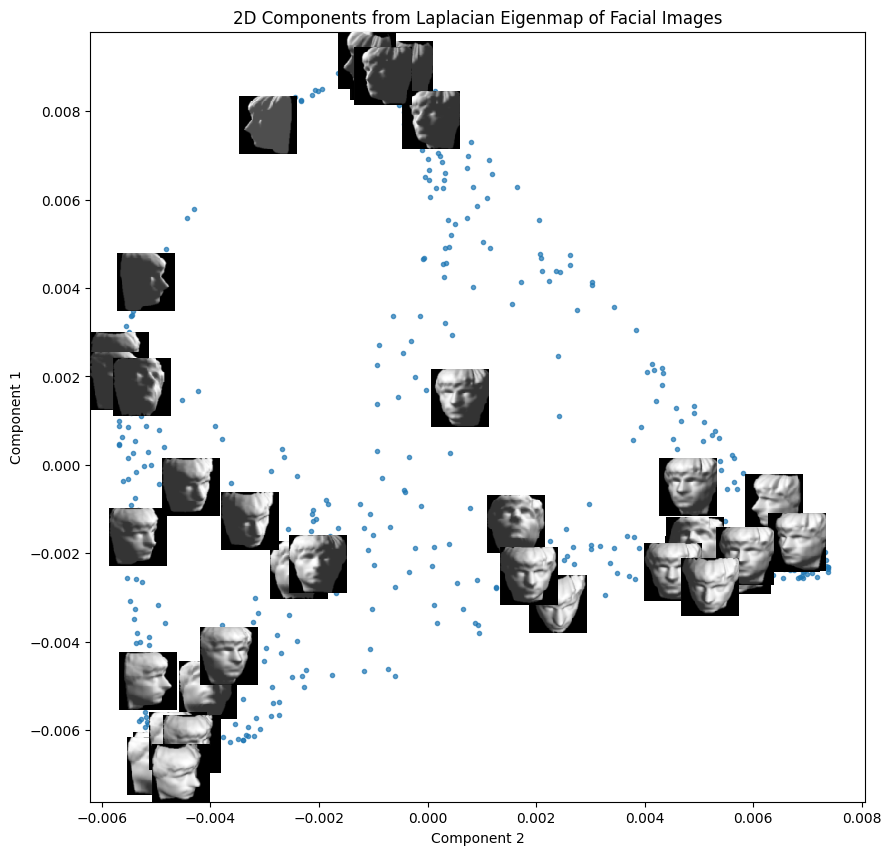

In [31]:
laplacian = SpectralEmbedding(n_components=2)
laplacian_result = laplacian.fit_transform(df)
laplacian_df = pd.DataFrame(laplacian_result, columns=['Component 1', 'Component 2'])

fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(111)
ax.set_title('2D Components from Laplacian Eigenmap of Facial Images')
ax.set_xlabel('Component: 1')
ax.set_ylabel('Component: 2')

x_size = (max(laplacian_df['Component 1']) - min(laplacian_df['Component 1'])) * 0.08
y_size = (max(laplacian_df['Component 2']) - min(laplacian_df['Component 2'])) * 0.08
for i in range(40):
    img_num = np.random.randint(0, num_images)
    x0 = laplacian_df.loc[img_num, 'Component 1'] - (x_size / 2.)
    y0 = laplacian_df.loc[img_num, 'Component 2'] - (y_size / 2.)
    x1 = laplacian_df.loc[img_num, 'Component 1'] + (x_size / 2.)
    y1 = laplacian_df.loc[img_num, 'Component 2'] + (y_size / 2.)
    img = df.iloc[img_num, :].values.reshape(pixels_per_dimension, pixels_per_dimension)
    ax.imshow(img, aspect='auto', cmap=plt.cm.gray, interpolation='nearest', zorder=100000, extent=(x0, x1, y0, y1))

ax.scatter(laplacian_df['Component 1'], laplacian_df['Component 2'], marker='.', alpha=0.7)

ax.set_ylabel('Component 1')
ax.set_xlabel('Component 2')

plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


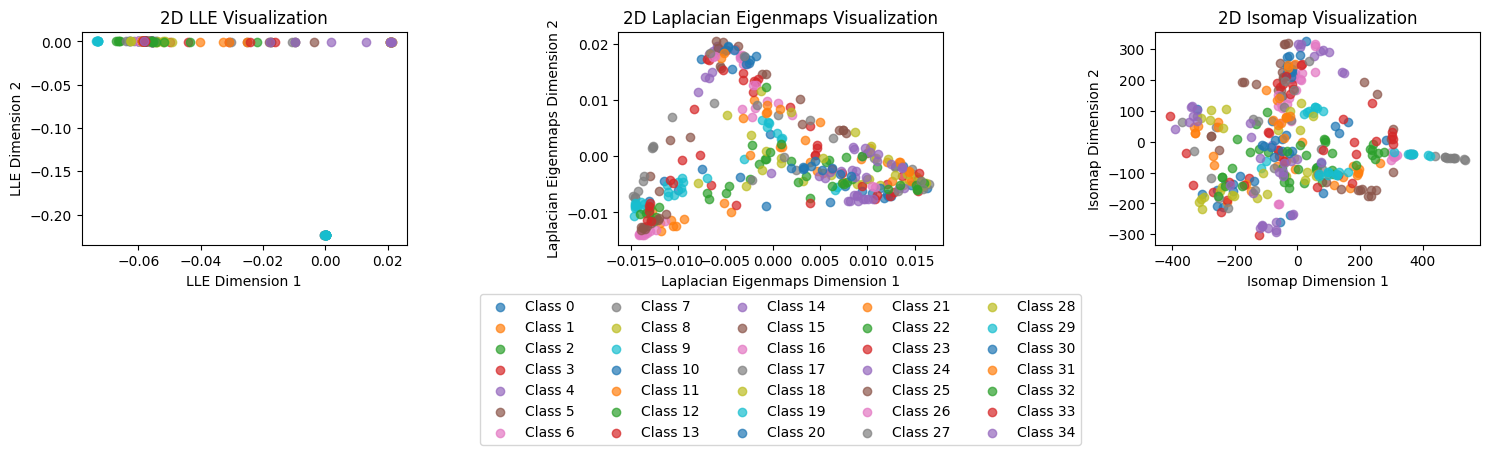

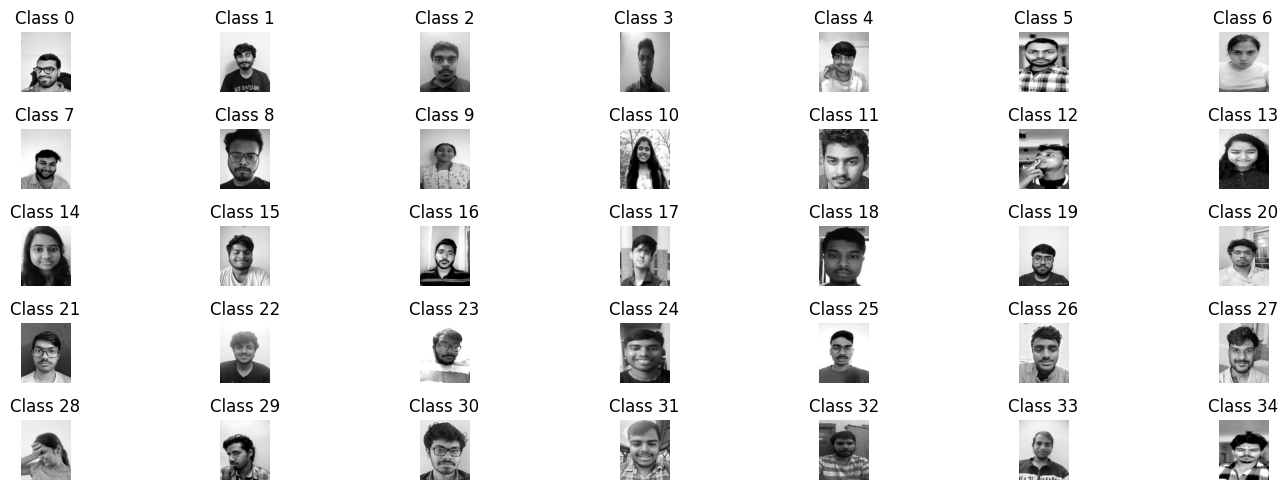

In [32]:
x_train_flat = x_train.reshape(x_train.shape[0], -1)

scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train_flat)

lle = LocallyLinearEmbedding(n_components=2)
x_train_lle = lle.fit_transform(x_train_std)

laplacian = SpectralEmbedding(n_components=2)
x_train_laplacian = laplacian.fit_transform(x_train_std)

isomap = Isomap(n_components=2)
x_train_isomap = isomap.fit_transform(x_train_std)
le = LabelEncoder()
y_train_numeric = le.fit_transform(y_train)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
for class_label in range(35):
    class_indices = np.where(y_train_numeric == class_label)[0]
    plt.scatter(x_train_lle[class_indices, 0], x_train_lle[class_indices, 1], label=f'Class {class_label}', alpha=0.7)
plt.title('2D LLE Visualization')
plt.xlabel('LLE Dimension 1')
plt.ylabel('LLE Dimension 2')

plt.subplot(1, 3, 2)
for class_label in range(35):
    class_indices = np.where(y_train_numeric == class_label)[0]
    plt.scatter(x_train_laplacian[class_indices, 0], x_train_laplacian[class_indices, 1], label=f'Class {class_label}', alpha=0.7)
plt.title('2D Laplacian Eigenmaps Visualization')
plt.xlabel('Laplacian Eigenmaps Dimension 1')
plt.ylabel('Laplacian Eigenmaps Dimension 2')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=5)

plt.subplot(1, 3, 3)
for class_label in range(35):
    class_indices = np.where(y_train_numeric == class_label)[0]
    plt.scatter(x_train_isomap[class_indices, 0], x_train_isomap[class_indices, 1], label=f'Class {class_label}', alpha=0.7)
plt.title('2D Isomap Visualization')
plt.xlabel('Isomap Dimension 1')
plt.ylabel('Isomap Dimension 2')

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))

unique_classes = np.unique(y_train_numeric)
num_classes = len(unique_classes)
num_rows = 5
num_cols = 7
for i, class_label in enumerate(unique_classes):
    plt.subplot(num_rows, num_cols, i + 1)
    class_indices = np.where(y_train_numeric == class_label)[0]

    first_image_size = x_train[class_indices[0]].shape

    if len(first_image_size) == 1:
        image_size = int(np.sqrt(first_image_size[0]))
        first_image = x_train[class_indices[0]].reshape(image_size, image_size)
    else:
        first_image = x_train[class_indices[0]].reshape(first_image_size)

    plt.imshow(first_image, cmap='gray')
    plt.title(f'Class {class_label}')
    plt.axis('off')

plt.tight_layout()
plt.show()


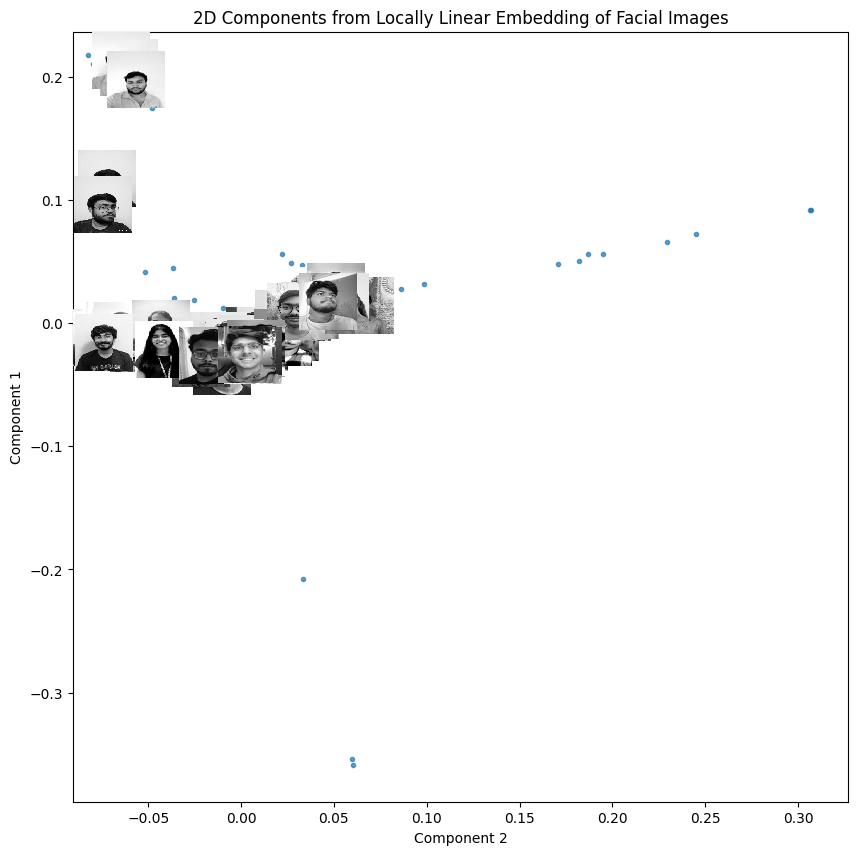

In [34]:
lle = LocallyLinearEmbedding(n_neighbors=10, n_components=2)
lle_result = lle.fit_transform(x_train_flat)
lle_df = pd.DataFrame(lle_result, columns=['Component 1', 'Component 2'])

fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(111)
ax.set_title('2D Components from Locally Linear Embedding of Facial Images')
ax.set_xlabel('Component: 1')
ax.set_ylabel('Component: 2')

x_size = (max(lle_df['Component 1']) - min(lle_df['Component 1'])) * 0.08
y_size = (max(lle_df['Component 2']) - min(lle_df['Component 2'])) * 0.08
for i in range(40):
    img_num = np.random.randint(0, x_train.shape[0])
    x0 = lle_df.loc[img_num, 'Component 1'] - (x_size / 2.)
    y0 = lle_df.loc[img_num, 'Component 2'] - (y_size / 2.)
    x1 = lle_df.loc[img_num, 'Component 1'] + (x_size / 2.)
    y1 = lle_df.loc[img_num, 'Component 2'] + (y_size / 2.)
    img = x_train[img_num].reshape(112, 92)
    ax.imshow(img, aspect='auto', cmap=plt.cm.gray, interpolation='nearest', zorder=100000, extent=(x0, x1, y0, y1))

ax.scatter(lle_df['Component 1'], lle_df['Component 2'], marker='.', alpha=0.7)

ax.set_ylabel('Component 1')
ax.set_xlabel('Component 2')

plt.show()

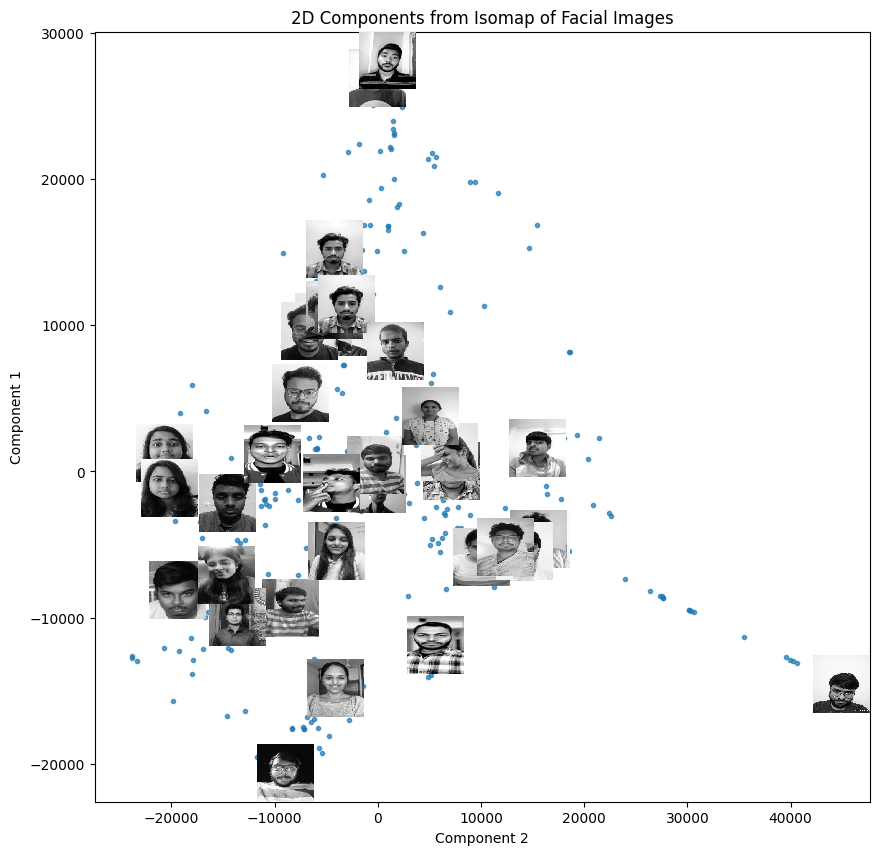

In [35]:
isomap = Isomap(n_components=2)
isomap_result = isomap.fit_transform(x_train_flat)
isomap_df = pd.DataFrame(isomap_result, columns=['Component 1', 'Component 2'])

fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(111)
ax.set_title('2D Components from Isomap of Facial Images')
ax.set_xlabel('Component: 1')
ax.set_ylabel('Component: 2')

x_size = (max(isomap_df['Component 1']) - min(isomap_df['Component 1'])) * 0.08
y_size = (max(isomap_df['Component 2']) - min(isomap_df['Component 2'])) * 0.08
for i in range(40):
    img_num = np.random.randint(0, x_train.shape[0])
    x0 = isomap_df.loc[img_num, 'Component 1'] - (x_size / 2.)
    y0 = isomap_df.loc[img_num, 'Component 2'] - (y_size / 2.)
    x1 = isomap_df.loc[img_num, 'Component 1'] + (x_size / 2.)
    y1 = isomap_df.loc[img_num, 'Component 2'] + (y_size / 2.)
    img = x_train[img_num].reshape(112, 92)
    ax.imshow(img, aspect='auto', cmap=plt.cm.gray, interpolation='nearest', zorder=100000, extent=(x0, x1, y0, y1))

ax.scatter(isomap_df['Component 1'], isomap_df['Component 2'], marker='.', alpha=0.7)

ax.set_ylabel('Component 1')
ax.set_xlabel('Component 2')

plt.show()


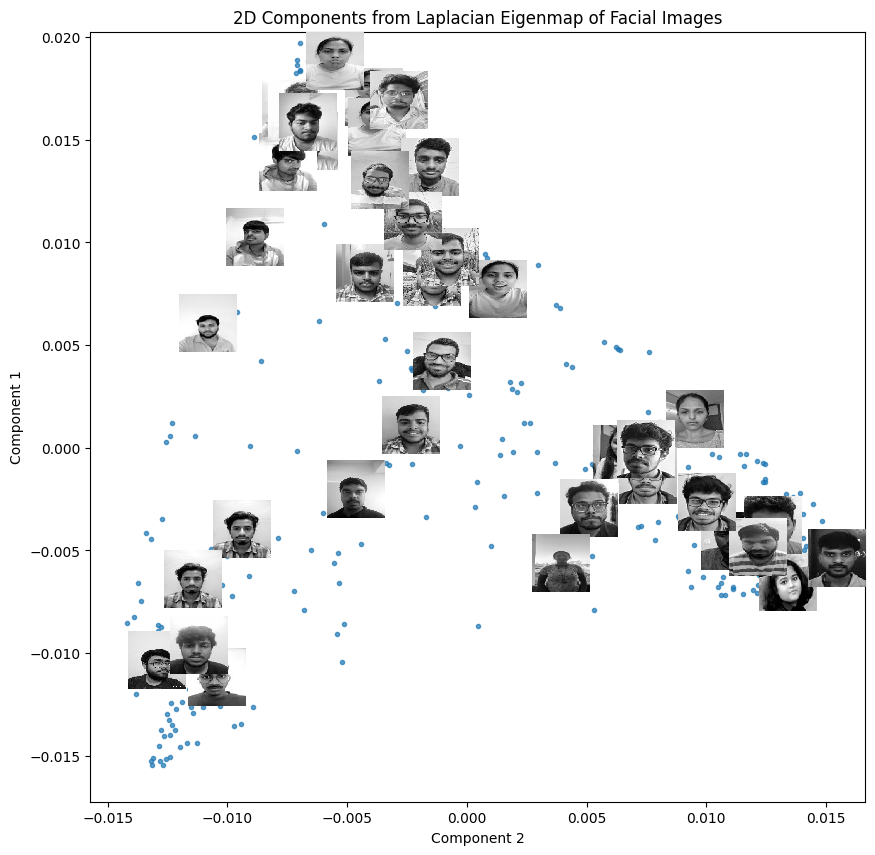

In [36]:
laplacian = SpectralEmbedding(n_components=2)
laplacian_result = laplacian.fit_transform(x_train_flat)
laplacian_df = pd.DataFrame(laplacian_result, columns=['Component 1', 'Component 2'])

fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(111)
ax.set_title('2D Components from Laplacian Eigenmap of Facial Images')
ax.set_xlabel('Component: 1')
ax.set_ylabel('Component: 2')

x_size = (max(laplacian_df['Component 1']) - min(laplacian_df['Component 1'])) * 0.08
y_size = (max(laplacian_df['Component 2']) - min(laplacian_df['Component 2'])) * 0.08
for i in range(40):
    img_num = np.random.randint(0, x_train.shape[0])
    x0 = laplacian_df.loc[img_num, 'Component 1'] - (x_size / 2.)
    y0 = laplacian_df.loc[img_num, 'Component 2'] - (y_size / 2.)
    x1 = laplacian_df.loc[img_num, 'Component 1'] + (x_size / 2.)
    y1 = laplacian_df.loc[img_num, 'Component 2'] + (y_size / 2.)
    img = x_train[img_num].reshape(112, 92)
    ax.imshow(img, aspect='auto', cmap=plt.cm.gray, interpolation='nearest', zorder=100000, extent=(x0, x1, y0, y1))

ax.scatter(laplacian_df['Component 1'], laplacian_df['Component 2'], marker='.', alpha=0.7)

ax.set_ylabel('Component 1')
ax.set_xlabel('Component 2')

plt.show()